# Contexte

Au vu des expérimentations précédentes, un CNN intégrant les connaissances acquises possédant une architecture plus adaptée peut maintenant être implémentée.

Néanmoins les ressources système sur un serveur, bien que supérieures aux ressources locales, restent aussi limitées : il est donc nécessaire de reprendre le code afin que le CNN puisse être entrainé correctement.

# Objectif

Le nouveau CNN reprend les connaissances découlant des expérimentations et itérations précédentes.

Pour des raisons évidentes de puissance de calcul, l'architecture adoptée ne pourra néanmoins pas être équivalente à un CNN hyper-performant comme par exemple les CNN VGG16.

Un compromis est donc nécessaire : par conséquent, l'architecture du CNN sera aussi motivée par l'architecture des CNN LeNet composés des couches suivantes pour des photos d'entrée de dimension 32\*32\*1 :

* Convolution 1 : 30 filtres, dimension d'entrée (28, 28, 1), dimension du noyau (5, 5), fonction d'activation ReLU, pas de dépassement du noyau.
* Max-Pooling 1 : dimension du pooling (2, 2).
* Convolution 2 : 16 filtres, dimension du noyau (3, 3), fonction d'activation ReLU, Pas de dépassement du noyau.
* Max-Pooling 2 : dimension du pooling (2, 2).
* Dropout : Connexions coupées: 20%.
* Aplatissement
* Dense 1 : 128 neurones, fonction d'activation ReLU.
* Dense 2 : 10 neurones, fonction d'activation softmax.

Bien entendu les hyper-parmètres du CNN seront adaptés pour l'apprentissage sur des photos de taille 128*128.


# Préconisations

**Pour éviter de devoir ré-entrainer entièrement le CNN** : Les données de poids du CNN entrainé doivent se trouver dans le répertoire data du projet.

**Pour pouvoir afficher l'historique de l'entrainement du CNN** : Le fichier contenant les données d'historique doit se trouver dans le répertoire data du projet.

**Pour exécuter ce fichier sans entrainement du CNN**, par exemple à des fins d'affichage des historiques ou de préditions : le paramètre epochs devra être égal à zéro.

**Pour exécuter ce fichier sur une plateforme Google colab**, la variable is_colab_platform doit être égale à True.


In [1]:
import os
import sys

# is_colab_platform = True
is_colab_platform = False

# Follow instructions for using kaggle with colab : https://www.kaggle.com/general/74235
if (is_colab_platform == True):
    
    # Extract the json api credentiel from kaggle
    # Load it in next cell
    ! pip install -q kaggle
    from google.colab import files
    files.upload()

    # Create a kaggle folder
    # Copy the json credentiel to it.
    ! mkdir ~/.kaggle
    ! cp kaggle.json ~/.kaggle/

    # Change the permissions of the file.
    ! chmod 600 ~/.kaggle/kaggle.json

    # Download the dataset zip
    ! kaggle datasets download -d vipoooool/new-plant-diseases-dataset

    # unzip the dataset zip
    ! mkdir dataset
    ! unzip new-plant-diseases-dataset.zip -d dataset

    # !dir

    dataset_train = "dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"
    dataset_valid = "dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/"
    dataset_test = "Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/test/"

    racine = '/content'

    weights_path = racine + '/cnn_4_weights'
    history_path = racine + '/cnn_4_history'

else:

    sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

    from lib import ressources as res
    racine = os.path.abspath(os.path.realpath(res.dir_root))

    weights_path = racine + '/data/cnn_4_weights'
    history_path = racine + '/data/cnn_4_history'

    dataset_train = res.dir_dataset_train
    dataset_valid = res.dir_dataset_valid
    dataset_test = res.dir_dataset_test

os.listdir(dataset_train)


['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spid

In [2]:
# les images vont être ajustées par le CNN de 256*256 à image_size*image_size
# normalement 128*128
image_size = 128

# nombre epochs a réaliser par itération
epochs = 0

# Gestion des sauvegardes liées au CNN et à son entrainement

In [3]:
from shutil import copyfile
import fnmatch
from datetime import datetime

# réalise une sauvegarde de secours des poids du cnn et de l'historique
def copy_weights_history_backup_files():
    # une sauvegarde de secours des poids du cnn et de l'historique est réalisée
    date_str = str(datetime.now()).replace(':', '-')

    for file in os.listdir(racine + '/data'):
        if fnmatch.fnmatch(file, 'cnn_*'):
            # file est égal à file_path quand le fichier est dans le répertoire courant
            file_in_path = racine + '/data/' + file
            file_out_path = racine + '/data/' + 'save_' + file + '_' + date_str
            print(file_in_path)
            copyfile(file_in_path, file_out_path)


In [4]:
# des poids existent : le CNN a déjà été entrainé
is_trained = os.path.isfile(history_path) 

# les sauvegardes de secours sont réalisées
if (is_trained == True):
    copy_weights_history_backup_files()

C:\Users\NOEL\dev\python\DATA SCIENTIST\_projet/data/cnn_4_history
C:\Users\NOEL\dev\python\DATA SCIENTIST\_projet/data/cnn_4_weights.data-00000-of-00001
C:\Users\NOEL\dev\python\DATA SCIENTIST\_projet/data/cnn_4_weights.index
C:\Users\NOEL\dev\python\DATA SCIENTIST\_projet/data/cnn_vgg16_128_history
C:\Users\NOEL\dev\python\DATA SCIENTIST\_projet/data/cnn_vgg16_128_weights.data-00000-of-00001
C:\Users\NOEL\dev\python\DATA SCIENTIST\_projet/data/cnn_vgg16_128_weights.index
C:\Users\NOEL\dev\python\DATA SCIENTIST\_projet/data/cnn_vgg16_256_history
C:\Users\NOEL\dev\python\DATA SCIENTIST\_projet/data/cnn_vgg16_256_weights.data-00000-of-00001
C:\Users\NOEL\dev\python\DATA SCIENTIST\_projet/data/cnn_vgg16_256_weights.index


# Préparation du CNN et du jeu de données

In [5]:
# Import des librairies pour le CNN

# initialisation du CNN de manière séquentielle et non en graphe
from keras.models import Sequential

# les vidéos sont en 3D, on ajoute une dimension supplémentaire qui est le temps
# étape de convolution -> 2D car image
from keras.layers import Conv2D

# étape de max pooling
from keras.layers import MaxPooling2D

# étape de flatten
from keras.layers import Flatten

# couches du CNN
from keras.layers import Dense

# CNN optimization : Dropout added to avoid overfiting
from keras.layers import Dropout

In [6]:
# le cnn est créé
def create_cnn(is_weights=False, optimizer='adam'):

    # Le CNN est initialisé en mode séquentiel
    classifier = Sequential()

    # Conv2D -> couche de convolution
    classifier.add(Conv2D(filters = 64, kernel_size = (5, 5), strides = 1, input_shape = (image_size, image_size, 3), activation = 'relu'))

    # couche : Max pooling
    classifier.add(MaxPooling2D(pool_size = (2, 2)))

    # Conv2D -> couche de convolution
    classifier.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, activation = 'relu'))

    # couche : Max pooling
    classifier.add(MaxPooling2D(pool_size = (2, 2)))

    # Couche : Flattening
    classifier.add(Flatten())

    # Couche : Full connection
    classifier.add(Dense(units = 160, activation = 'relu'))

    classifier.add(Dropout(0.2))

    # Couche : Full connection
    classifier.add(Dense(units = 96, activation = 'relu'))

    classifier.add(Dropout(0.2))

    # Couche de sortie
    classifier.add(Dense(units = 38, activation = 'softmax'))

    # compilation du CNN
    classifier.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    # des poids existent : le CNN est initialisé avec ceux-ci
    if(is_weights == True):
        classifier.load_weights(weights_path)

    # le CNN est retourné
    return classifier

In [7]:
# augmentation du jeu d'images
from keras.preprocessing.image import ImageDataGenerator

# le jeu de données est enrichi de nouvelles images générées
def generate_images():

    # préparation du traitement de génération de nouvelles images pour le jeu d'entrainement
    train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.6,
                                   zoom_range = 0.6,
                                   horizontal_flip = True,
                                   vertical_flip=True,
                                   rotation_range=0.30)

    # préparation du traitement de génération de nouvelles images pour le jeu de test : l'échelle des valeurs est normalisées
    test_datagen = ImageDataGenerator(rescale = 1./255)

    # batch_size : 
    # 32 - 64 : suffit pour image
    # 64 - 128 : minimum pour texte
    # 32 - 64 : audio
    batch_size = 64

    # traitement des images du jeu d'entrainement
    training_set = train_datagen.flow_from_directory(dataset_train,
                                                 target_size = (image_size, image_size),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

    # traitement des images du jeu de test
    test_set = test_datagen.flow_from_directory(dataset_valid,
                                            target_size = (image_size, image_size),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

    # le jeux de données est retourné
    return training_set, test_set


In [8]:
# entrainement du CNN
def training_cnn(epochs = 0):

    steps_per_epoch = training_set.n // training_set.batch_size
    validation_step = test_set.n // test_set.batch_size


    # fit_generator -> entraine le CNN et effectue le test aussi et mesure la performance
    training_history = classifier.fit_generator(training_set,
                         steps_per_epoch = steps_per_epoch,
                         epochs = epochs,
                         validation_data = test_set,
                         validation_steps = validation_step)

    # l'historique de l'entrainement est retourné
    return training_history

In [9]:
def update_history(previous_history, training_history):
    
    train_accuracy = previous_history['accuracy'] + training_history['accuracy']
    val_accuracy = previous_history['val_accuracy'] + training_history['val_accuracy']
    train_loss = previous_history['loss'] + training_history['loss']
    val_loss = previous_history['val_loss'] + training_history['val_loss']

    history = {
        'accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'loss': train_loss,
        'val_loss': val_loss
    }

    # retourne l'historique mis à jour
    return history

# Préparation du CNN
## Initialisation du CNN
## Génération des images supplémentaires du jeu de données
## Entrainement du CNN

In [10]:
import keras

# le learning rate est modifié
# optimizer = keras.optimizers.Adam(learning_rate=0.0001)
optimizer = keras.optimizers.Adam()

# le CNN est créé
classifier = create_cnn(is_weights = is_trained, optimizer=optimizer)
classifier.summary()

# des images supplémentaires pour le jeu de données sont générées
training_set, test_set = generate_images()

# le CNN est entrainé
training_history = training_cnn(epochs=epochs)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0         
_________________________________________________________________
dense (Dense)                (None, 160)               18432160  
_________________________________________________________________
dropout (Dropout)            (None, 160)               0

# Enregistrement des données
## Poids du CNN entrainé 
## Historique des entrainements successifs

In [11]:
# enregistre l'historique de l'entrainement et les poids du CNN
import pickle

# l'history est mis à jour à partir de training_history et, le cas échéant, de l'historique 
# de l'entrainement précédent qui a été enregistré

# le CNN a déjà été entrainé, un historique d'entrainement existe déjà
if (is_trained == True):
    previous_history = pickle.load(open(history_path, 'rb'))
    # le CNN est plus entrainé
    if (epochs == 0):
        history = previous_history
    else:
        history = update_history(previous_history, training_history.history)
else:
    history = training_history.history

# history est enregistré
pickle.dump(history, open(history_path, 'wb'))

# les poids sont enregistrés
classifier.save_weights(weights_path);


In [12]:
# nombre d'epochs
print('epoch count -> ', len(history['accuracy']))

# l'historique mis à jour est affiché pour contrôle
# print(history)

epoch count ->  220


# Dataviz des résultats

## Statistiques sur les derniers entrainements du CNN

In [13]:
import pandas as pd
import numpy as np

df_last_history = pd.DataFrame()

for key, value in history.items():
    df_last_history[key] = value[-20:]

# description mathématique des fonctions coûts et des scores du CNN : pour derniers entrainements
print('Description mathématique des ', str(df_last_history.shape[0]), ' derniers epochs')
df_last_history.describe()

Description mathématique des  20  derniers epochs


,accuracy,val_accuracy,loss,val_loss
count,20.000000,20.000000,20.000000,20.000000
mean,0.973116,0.979211,0.084291,0.065506
std,0.000683,0.000288,0.001778,0.000824
min,0.971437,0.978672,0.081185,0.064033
25%,0.972783,0.979015,0.082941,0.064906
50%,0.973253,0.979271,0.084214,0.065407
75%,0.973530,0.979371,0.085542,0.066007
max,0.974399,0.979756,0.088408,0.066959


In [14]:
# les scores obtenus pendant le (ou les) entrainement(s) sont lus
train_accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

# les fonctions coûts pendant le (ou les) entrainement(s) sont lues
train_loss = history['loss']
val_loss = history['val_loss']

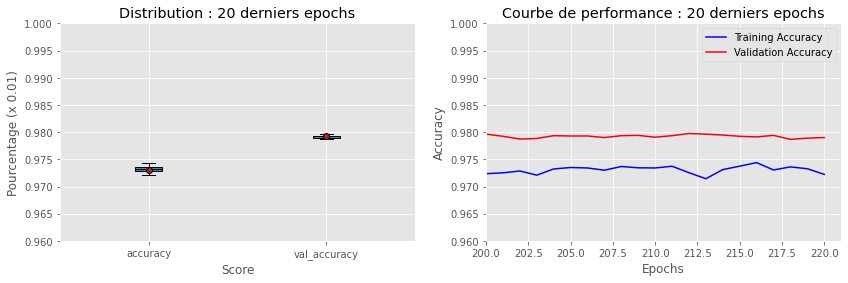

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.figure(figsize=(14, 4))
plt.subplot(121)
plt.boxplot([df_last_history.accuracy, df_last_history.val_accuracy],
            labels=["accuracy", "val_accuracy"],
            showfliers=False, 
            medianprops=medianprops, 
            vert=True, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops)

plt.title('Distribution : ' + str(df_last_history.shape[0]) + ' derniers epochs')
plt.xlabel('Score')
plt.ylabel('Pourcentage (x 0.01)')
plt.ylim(0.96, 1.0)

plt.subplot(122)
# Courbe de la précision sur l'échantillon d'entrainement
plt.plot(np.arange(1 , len(history['accuracy']) + 1, 1),
         train_accuracy,
         label = 'Training Accuracy',
         color = 'blue')

# Courbe de la précision sur l'échantillon de validation
plt.plot(np.arange(1 , len(history['val_accuracy']) + 1, 1),
         val_accuracy, 
         label = 'Validation Accuracy',
         color = 'red')

# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Courbe de performance : ' + str(df_last_history.shape[0]) + ' derniers epochs')

plt.xlim(len(history['val_accuracy']) - df_last_history.shape[0], len(history['val_accuracy']) + 1)
plt.ylim(0.96, 1.0)

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show();


## Fonction coût du CNN

### Courbe d'entrainement
### Courbe de validation

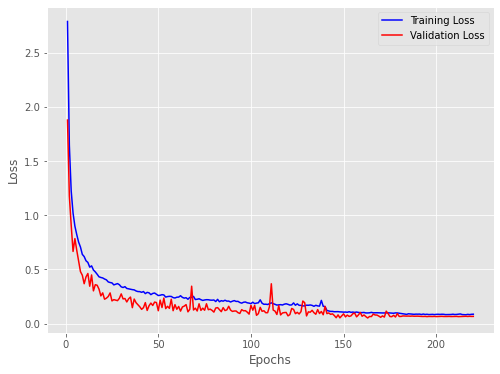

In [16]:

plt.figure(figsize=(8, 6))

# Courbe de la perte sur l'échantillon d'entrainement
plt.plot(np.arange(1 , len(history['loss']) + 1, 1),
         train_loss,
         label = 'Training Loss',
         color = 'blue')

# Courbe de la perte sur l'échantillon de validation
plt.plot(np.arange(1 , len(history['val_loss']) + 1, 1),
         val_loss, 
         label = 'Validation Loss',
         color = 'red')

# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show();

## Performance du CNN

### Courbe d'entrainement
### Courbe de validation

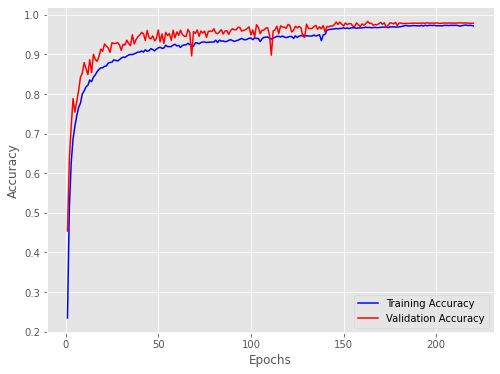

In [17]:

plt.figure(figsize=(8, 6))

# Courbe de la précision sur l'échantillon d'entrainement
plt.plot(np.arange(1 , len(history['accuracy']) + 1, 1),
         train_accuracy,
         label = 'Training Accuracy',
         color = 'blue')

# Courbe de la précision sur l'échantillon de validation
plt.plot(np.arange(1 , len(history['val_accuracy']) + 1, 1),
         val_accuracy, 
         label = 'Validation Accuracy',
         color = 'red')

# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show();

# Phase de prédiction

## Prédiction sur les données de test
## Affichage des résultats

In [18]:
from keras.preprocessing import image
import matplotlib.image as mpimg
import numpy as np


# affiche le résultat des prédictions
def predictions(files_to_predict):

    # traitement des images du jeu d'entrainement
    train_datagen = ImageDataGenerator()

    predict_set = train_datagen.flow_from_directory(
        dataset_train,
        target_size = (image_size, image_size), 
        class_mode = 'categorical')

    indice_value_classes = {v: k for k, v in predict_set.class_indices.items()}

    # Prédire la classe de chaque fichier
    for file in listdirectory(dataset_test):

        test_image = image.load_img(file, target_size = (128, 128))
        test_image = image.img_to_array(test_image)/255
        test_image = np.expand_dims(test_image, axis = 0)

        predict = classifier.predict(test_image)
        indice_predict = np.argmax(predict[0])
        trust_rate = predict[0][indice_predict]

        file_name = os.path.split(file)[1]

        result = '\n\nFichier : \t\t' + file_name + \
            '\nClasse prédite : \t' + indice_value_classes[indice_predict] + \
            '\nIndice de confiance : \t' + str(round(trust_rate * 100, 2)) + '%'

        print(result)



In [19]:
# Récupérer la liste des fichiers à prédire
from lib.tools import listdirectory

# le jeu de données de test sert à évaluer les prédictions du CNN
predictions(listdirectory(dataset_test))

Found 70295 images belonging to 38 classes.


Fichier : 		AppleCedarRust1.JPG
Classe prédite : 	Apple___Cedar_apple_rust
Indice de confiance : 	100.0%


Fichier : 		AppleCedarRust2.JPG
Classe prédite : 	Apple___Cedar_apple_rust
Indice de confiance : 	100.0%


Fichier : 		AppleCedarRust3.JPG
Classe prédite : 	Apple___Cedar_apple_rust
Indice de confiance : 	100.0%


Fichier : 		AppleCedarRust4.JPG
Classe prédite : 	Apple___Cedar_apple_rust
Indice de confiance : 	100.0%


Fichier : 		AppleScab1.JPG
Classe prédite : 	Apple___Apple_scab
Indice de confiance : 	93.18%


Fichier : 		AppleScab2.JPG
Classe prédite : 	Apple___Apple_scab
Indice de confiance : 	100.0%


Fichier : 		AppleScab3.JPG
Classe prédite : 	Apple___Apple_scab
Indice de confiance : 	94.56%


Fichier : 		CornCommonRust1.JPG
Classe prédite : 	Corn_(maize)___Common_rust_
Indice de confiance : 	100.0%


Fichier : 		CornCommonRust2.JPG
Classe prédite : 	Corn_(maize)___Common_rust_
Indice de confiance : 	100.0%


Fichier : 		CornCo

In [21]:
import numpy as np
from keras.preprocessing import image

file = 'C:/Users/NOEL/dev/python/dataset/plant-dataset/test/AppleCedarRust2.JPG'

test_image = image.load_img(file, target_size = (image_size, image_size))
test_image = image.img_to_array(test_image) / 255
test_image = np.expand_dims(test_image, axis = 0)

predict = classifier.predict(test_image)
classe_indices = training_set.class_indices
indice_predict = np.argmax(predict)

print(predict)
print(classe_indices)
print(indice_predict)

[[1.7554751e-11 2.2275991e-13 9.9999714e-01 1.0568209e-21 1.6990656e-14
  1.4435877e-22 1.6122397e-29 2.8492070e-06 4.3362428e-10 1.3758668e-10
  8.5141945e-25 5.2922000e-15 2.3801962e-11 1.7234857e-26 2.5748613e-27
  2.5889929e-21 1.6428466e-15 6.2178711e-23 4.3105997e-20 5.6833806e-22
  5.9167598e-19 5.9270144e-27 4.6158531e-29 1.5596506e-32 1.5258605e-23
  2.5767615e-24 2.7211215e-19 3.3507287e-34 1.3348048e-11 7.7640651e-19
  1.7591165e-17 2.3760188e-22 6.8473442e-20 1.4252401e-38 4.2789540e-17
  8.5716363e-28 2.1210912e-31 1.3441288e-24]]
{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___L

# Synthèse

## Amélioration du CNN

Comme indiqué au début de ce fichier, le CNN a été amélioré :

* une couche de Convolution a été ajoutée
* une couche de Max pooling a été ajoutée
* une couche Dense a été ajoutée
* une couche Dropout a été ajoutée
* les hyper-paramètres ont été adaptés à ce nouveau CNN.

## Environnement d'exécution et adaptation du code

Malgré la mise à disposition d'un serveur d'éxécution, celui-ci n'était pas adapté au projet : puissance de calcul assez faible, déconnections intempestives.

La plateforme Google colab a ensuite été choisie pour obtenir une meilleure puissance de calcul : malgré cela, les sessions ont une durée limitée de 12 heures.

La ré-écriture du code a donc été nécessaire afin que le CNN puisse être entrainé sur plusieurs itérations car l'entrainement complet prend un temps assez long et les sessions sont insuffisantes en durée.

Maintenant, les poids du CNN sont enregistrés et rétablis à chaque itération d'entrainement.

Un historique cumulatif des entrainements du CNN est aussi enregistré et rétabli à chaque itération d'entrainement.

Enfin, un backup des fichiers de poids du CNN et de l'historique cumulatif est réalisé à chaque exécution du script avec un horodatage sur chaque fichier sauvegardé : en effet, il fallait éviter qu'une exécution malencontreuse du script efface définitivement les données issus des longs entrainements précédents.

## Optimisation finale du CNN

Une fois que la courbe de performance a convergé vers un maximum et s'est stabilisée vers cette valeur, une dernière itération d'entrainement a été réalisée avec un learning rate plus petit : cela a permis de s'assurer du score maximum du CNN.

Le maximum de ce modèle a été atteint : les valeurs des dernières epochs sont très stables et l'écart type des distributions, pour l'entrainement et la validation, est extrêment faible.

Cela a été principalement dû à l'ajustement du hyper-paramètre learning rate qui a été choisi de plus en plus petit au fur à mesure de la convergeance des courbes d'apprentissage vers leur maximum.

## Résultats du CNN

Les résultats de performance du CNN sont de :

* près de 97,3 % pour le jeu de données d'entrainement
* près de 98 % pour le jeu de validation

Les courbes d'entrainement et de test sont quasi-superposées ce qui montre que le modèle ne fait ni d'overfiting, ni de underfitting.

Sur le jeu de données de test, la prédiction du CNN a été faite avec 100 % de réussite. Le moins bon indice de confiance des prédictions a été de près de 92 %, et une très grande majorité des prédictions a été réalisée avant un indice de confiance compris entre 99 % et 100 %.

On constate donc que la performance du CNN est vraiment très satisfaisante et excellente.


# Conclusion

A ce stade, il est raisonnable de pouvoir dire que les objectifs sont atteints.

Bien entendu, un CNN avec plus de couches de Convolution + Max pooling + Dense + Dropout, et des images d'entrée de 256*256 permettrait peut-être d'améliorer de quelques dixièmes de point la performance, voire d'atteindre le score summum de 100% : mais pour quels coûts de calculs, de temps, de ressources système...

Maintenant, il reste d'autres pistes d'exploration et d'autres solutions peuvent être expérimentées comme, par exemple :

* **Transfer learning** en utilisant un CNN VGG16 et en l'entraînant sur ses dernières couches de convolution et sur sa partie classification.

* **Features extraction** en utilisant la partie d'extraction des features du CNN et en la combinant avec un modèle de classification classique comme un modèle SVM ou autre.
